---

# Gamaka Based Classification

---

### Pitch Standard Deviation
The pitch standard deviation serves as an indicator of **svaras** that exhibit **gamakas** (ornamentations).

In [1]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

## Load dataset

In [2]:
X = np.load('../dataset/stds.npy')
y = np.load('../dataset/labels.npy')
classes = np.load('../dataset/mappings.npy')

In [3]:
X = np.expand_dims(X, axis=-1)

In [4]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (36262, 73, 1)
y shape: (36262, 40)


## Train-test split

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Model

In [6]:
x_input = keras.layers.Input(shape=(X.shape[1], X.shape[2]))

In [8]:
x = keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x_input)
x = keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.Dropout(0.25)(x)

x = keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x_input)
x = keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.Dropout(0.25)(x)

x = keras.layers.Conv1D(128, 3, activation='relu', padding='same')(x)
x = keras.layers.Conv1D(128, 3, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.Dropout(0.25)(x)

I0000 00:00:1744456285.462501   19241 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1744456285.524731   19241 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1744456285.524811   19241 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1744456285.530028   19241 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1744456285.530097   19241 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [9]:
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(64, activation='relu')(x)

In [10]:
output = keras.layers.Dense(y.shape[1], activation='softmax')(x)

model = keras.models.Model(inputs=x_input, outputs=output)

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 73, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 73, 32)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 73, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 36, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 36, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 40)             │         2,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 718,312 (2.74 MB)

 Trainable params: 718,312 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [12]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50


I0000 00:00:1744456294.948941   19426 service.cc:146] XLA service 0x7f236c002cb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744456294.948980   19426 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5


 27/794 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0368 - loss: 3.6815

I0000 00:00:1744456299.347913   19426 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


794/794 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.0578 - loss: 3.5818 - val_accuracy: 0.1039 - val_loss: 3.3618
Epoch 2/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1363 - loss: 3.1766 - val_accuracy: 0.2442 - val_loss: 2.7315
Epoch 3/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2273 - loss: 2.7631 - val_accuracy: 0.2817 - val_loss: 2.5565
Epoch 4/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2723 - loss: 2.5803 - val_accuracy: 0.3080 - val_loss: 2.4180
Epoch 5/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2903 - loss: 2.4981 - val_accuracy: 0.3227 - val_loss: 2.3423
Epoch 6/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3108 - loss: 2.4242 - val_accuracy: 0.3407 - val_loss: 2.2986
Epoch 7/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3306 - loss: 2.3373 - val_accuracy: 0.3558 - val_loss: 2.2549
Epoch 8/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3478 - loss: 2.2917 - val_accuracy: 0.3686 - va

In [13]:
# Save the model
model.save('../models/gamaka_model.keras')

## Test

In [14]:
# Load the arohana-avarohana model
model = keras.models.load_model('../models/gamaka_model.keras')

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4554 - loss: 2.0023


In [16]:
print(f'Test accuracy: {round(accuracy * 100, 2)}')

Test accuracy: 44.82


In [17]:
y_pred = model.predict(X_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='macro')
print(f'f1 score: {f1}')

f1 score: 0.41408267125085657


In [19]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

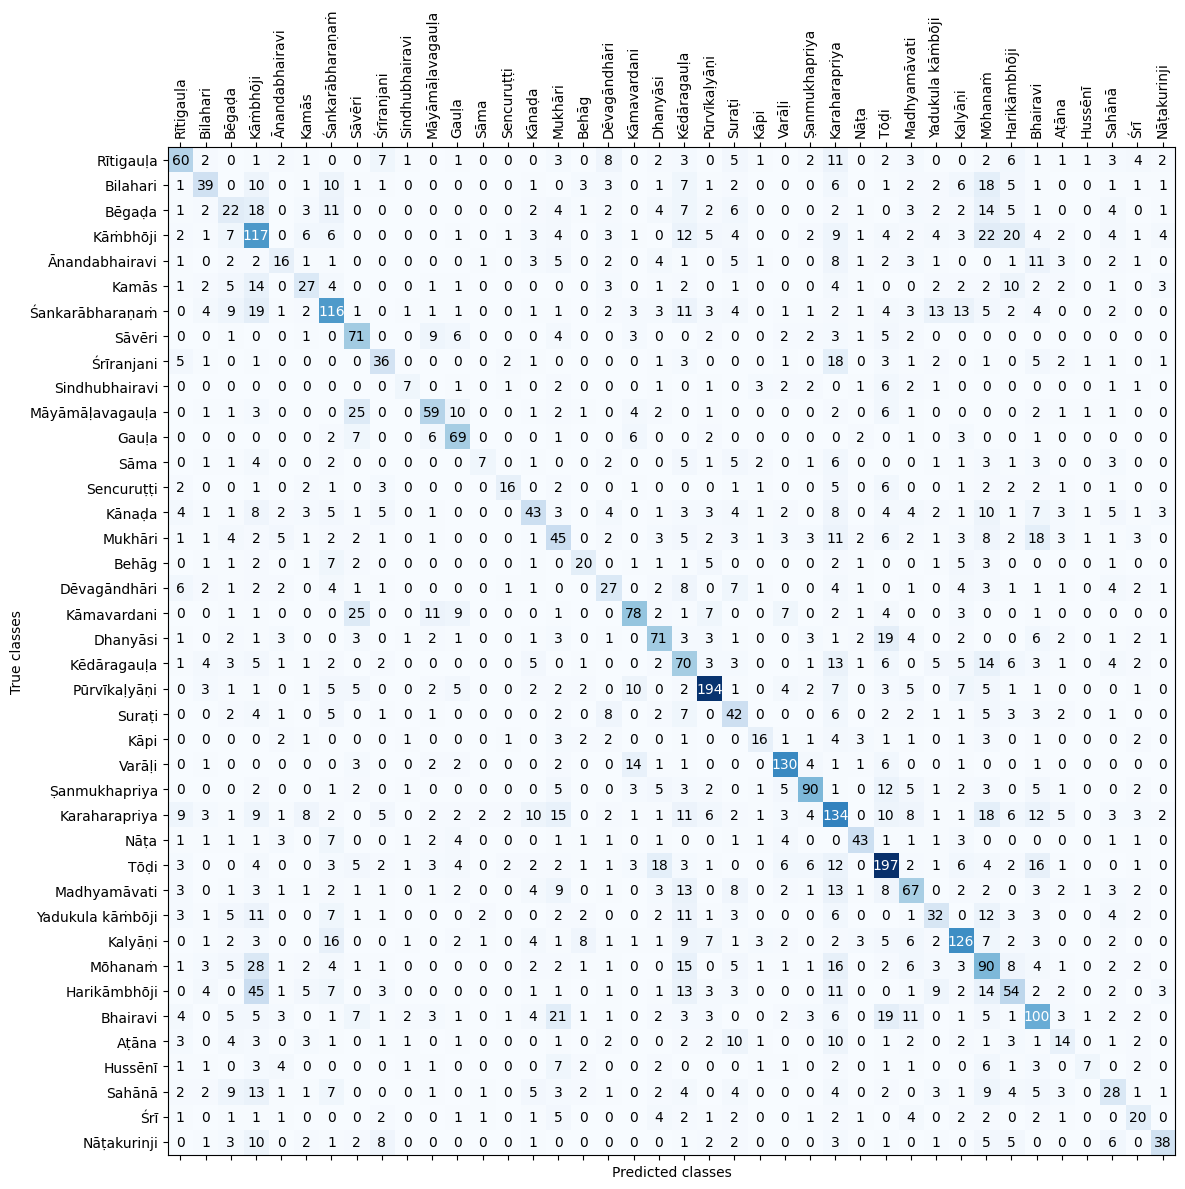

In [20]:
fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.matshow(cm, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)

ax.set_xlabel('Predicted classes')
ax.set_ylabel('True classes')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'black' if cm[i, j] < max(cm.flatten()) / 2 else 'white'
        ax.text(j, i, cm[i, j], ha='center', va='center', color=color)

plt.savefig('../plots/confusion_matrix_stds.png', dpi=300)
plt.tight_layout()
plt.show()